In [47]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt #Visualization

In [49]:
#Import Dataset
ds = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DS Colleges.xlsx')
ai = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AI Colleges.xlsx')

In [50]:
ds.head(3)

,Number,Course,University,City,Direction,Requirement,Tuition Fees,Link
0,1,Data Analytics,University of Hildesheim,Hildesheim,N,IELTS,No,https://www2.daad.de/deutschland/studienangebo...
1,2,Data Engineering and Analytics,Technical University Munich,München,SE,"IELTS, GRE",No,https://www2.daad.de/deutschland/studienangebo...
2,3,Natural Language Processing,Trier University,Trier,SW,IELTS,No,https://www2.daad.de/deutschland/studienangebo...


In [51]:
ai.head(3)

,Course,University,City,Direction,Requirement,Tuition Fees,Link
0,Artificial Intelligence and Data Science,Deggendorf Institute of Technology,Deggendorf,SE,IELTS,No,https://www2.daad.de/deutschland/studienangebo...
1,Artificial Intelligence and Data Science,Heinrich Heine University Düsseldorf,Düsseldorf,W,IELTS,No,https://www2.daad.de/deutschland/studienangebo...
2,Artificial Intelligence Engineering,University of Passau,Passau,SE,IELTS,No,https://www2.daad.de/deutschland/studienangebo...


In [52]:
#Missing Values
ds.isnull().sum()

Number          0
Course          0
University      0
City            0
Direction       0
Requirement     0
Tuition Fees    0
Link            0
dtype: int64

In [53]:
#Missing Values
ai.isnull().sum()

Course          0
University      0
City            0
Direction       0
Requirement     0
Tuition Fees    0
Link            0
dtype: int64

In [54]:
#Drop 'Number' column
new_ds = ds.drop(['Number'], axis=1)
new_ds.head(5)

,Course,University,City,Direction,Requirement,Tuition Fees,Link
0,Data Analytics,University of Hildesheim,Hildesheim,N,IELTS,No,https://www2.daad.de/deutschland/studienangebo...
1,Data Engineering and Analytics,Technical University Munich,München,SE,"IELTS, GRE",No,https://www2.daad.de/deutschland/studienangebo...
2,Natural Language Processing,Trier University,Trier,SW,IELTS,No,https://www2.daad.de/deutschland/studienangebo...
3,Data & Knowledge Engineering,Otto von Guericke University Magdeburg,Magdeburg,NE,IELTS,No,https://www2.daad.de/deutschland/studienangebo...
4,Data Science,Kiel University,Kiel,N,"IELTS, GRE",No,https://www2.daad.de/deutschland/studienangebo...


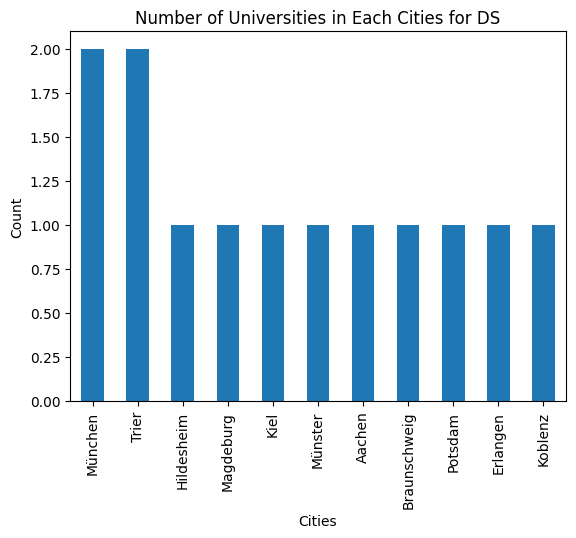

In [55]:
#Selecting the Column 'City'
ds_cities_count = new_ds['City'].value_counts()
ds_cities_count.plot.bar()

#X and Y axis
plt.xlabel('Cities')
plt.ylabel('Count')

#Title
plt.title('Number of Universities in Each Cities for DS')

#Display
plt.show()

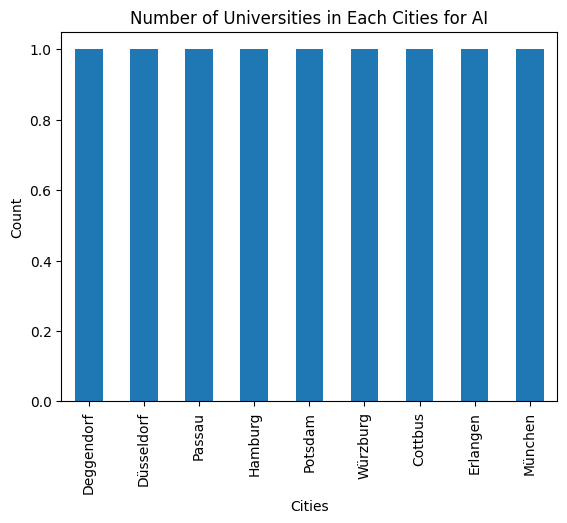

In [56]:
#Selecting the Column 'City'
ai_cities_count = ai['City'].value_counts()
ai_cities_count.plot.bar()

#X and Y axis
plt.xlabel('Cities')
plt.ylabel('Count')

#Title
plt.title('Number of Universities in Each Cities for AI')

#Display
plt.show()

In [57]:
#Count
new_ds['Requirement'].value_counts()

IELTS         9
IELTS, GRE    3
IELTS,        1
Name: Requirement, dtype: int64

In [58]:
ai['Requirement'].value_counts()

IELTS              8
IELTS, GRE (NM)    1
Name: Requirement, dtype: int64

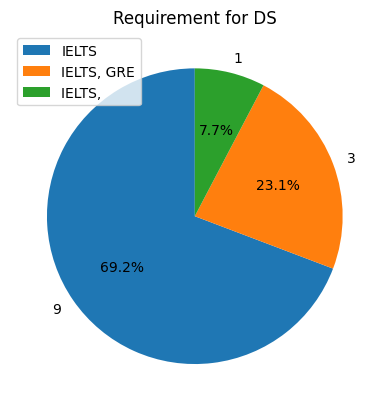

In [59]:
#Selecting the Column 'Requirement'
plt.pie(new_ds['Requirement'].value_counts(), labels=new_ds['Requirement'].value_counts(), startangle=90, autopct='%.1f%%')
plt.legend(new_ds['Requirement'].value_counts().index)
plt.title('Requirement for DS')

#Display
plt.show()

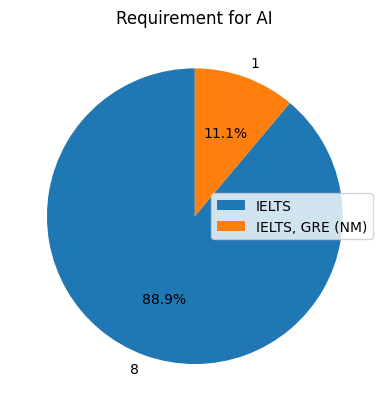

In [60]:
#Selecting the Column 'Requirement'
plt.pie(ai['Requirement'].value_counts(), labels=ai['Requirement'].value_counts(), startangle=90, autopct='%.1f%%')
plt.legend(ai['Requirement'].value_counts().index)
plt.title('Requirement for AI')

#Display
plt.show()

In [61]:
#Libraries for Plotting in a Map
import folium
from geopy.geocoders import Nominatim

In [63]:
# Create an instance of the geocoder
geolocator = Nominatim(user_agent='my_geocoder')

# Create a map centered around the first city in the DataFrame
first_location = geolocator.geocode(new_ds['City'].iloc[0])
latitude = first_location.latitude
longitude = first_location.longitude
map_cities = folium.Map(location=[latitude, longitude], zoom_start=4)

# Iterate over each city name in the 'Location' column
for city_name in new_ds['City']:
    # Geocode the city name to get the coordinates
    location = geolocator.geocode(city_name)

    # Check if coordinates are found for the city
    if location:
        latitude = location.latitude
        longitude = location.longitude

        # Add a marker for the city
        folium.Marker([latitude, longitude], popup=city_name).add_to(map_cities)

# Display the map
#map_cities.save('cities_for_ds.html')  # Save the map as an HTML file
map_cities

In [64]:
# Create an instance of the geocoder
geolocator = Nominatim(user_agent='my_geocoder')

# Create a map centered around the first city in the DataFrame
first_location = geolocator.geocode(ai['City'].iloc[0])
latitude = first_location.latitude
longitude = first_location.longitude
map_cities = folium.Map(location=[latitude, longitude], zoom_start=4)

# Iterate over each city name in the 'Location' column
for city_name in ai['City']:
    # Geocode the city name to get the coordinates
    location = geolocator.geocode(city_name)

    # Check if coordinates are found for the city
    if location:
        latitude = location.latitude
        longitude = location.longitude

        # Add a marker for the city
        folium.Marker([latitude, longitude], popup=city_name).add_to(map_cities)

# Display the map
#map_cities.save('cities_for_ai.html')  # Save the map as an HTML file
map_cities